In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.loadtxt('../data/phot.dat')

In [5]:
time = data[:, 0]     # Time in HJD
flux = data[:, 1]     # Brightness
error = data[:, 2]    # Measurement error


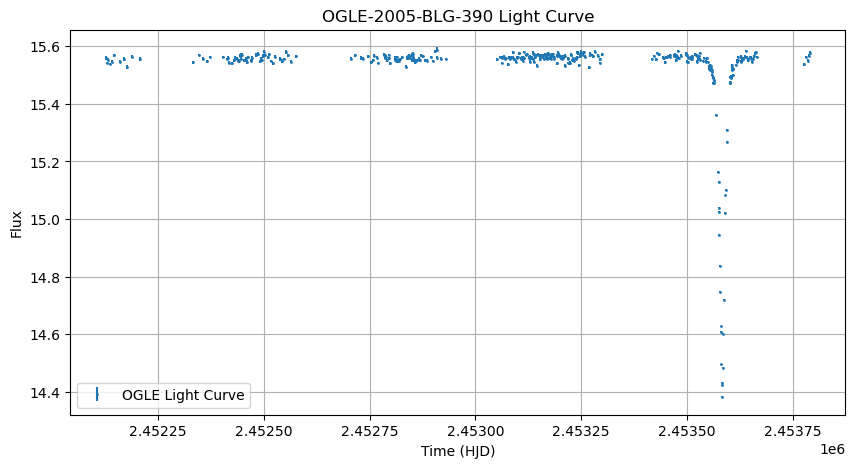

In [6]:
# Plot
plt.figure(figsize=(10, 5))
plt.errorbar(time, flux, yerr=error, fmt='.', markersize=2, label="OGLE Light Curve")
plt.xlabel("Time (HJD)")
plt.ylabel("Flux")
plt.title("OGLE-2005-BLG-390 Light Curve")
plt.legend()
plt.grid(True)
plt.savefig('../plots/ogle_blg_390_curve.png')
plt.show()

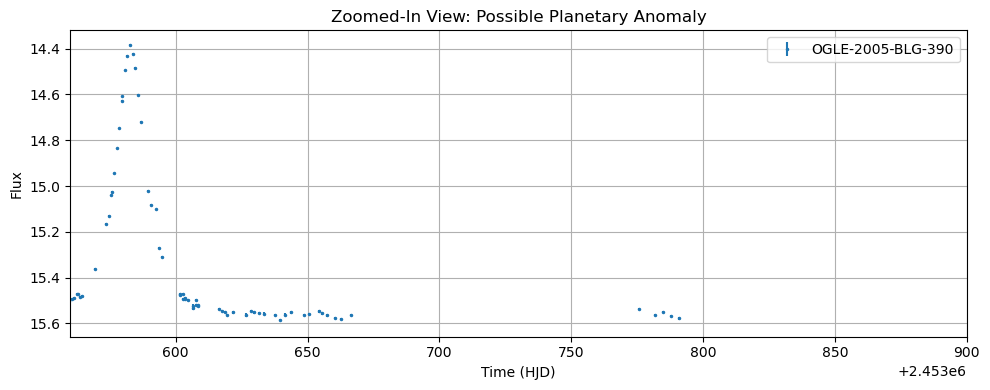

In [10]:
# Focus on suspected planet anomaly
plt.figure(figsize=(10, 4))
plt.errorbar(time, flux, yerr=error, fmt='.', markersize=3, label="OGLE-2005-BLG-390")
plt.title("Zoomed-In View: Possible Planetary Anomaly")
plt.xlabel("Time (HJD)")
plt.ylabel("Flux")
plt.xlim(2453560, 2453900)  # Adjust if needed
plt.grid(True)
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

C:\Users\Varsha Kothari\AppData\Local\Temp\ipykernel_15704\3383228813.py:33: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(paczynski, t_fit, f_norm, p0=guess, bounds=bounds)


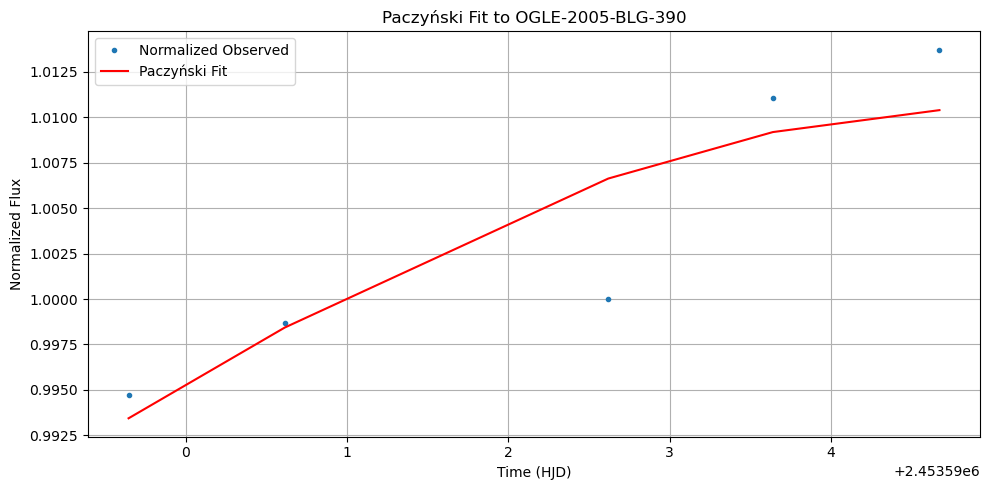

t0 = 2453595.00000
u0 = 0.89591
tE = 13.09662
Fs = 0.22771
Fb = 0.68541


In [24]:

from scipy.optimize import curve_fit

# Step 1: Load your data


# Step 2: Focus on the microlensing event window
# Step 2: Focus on the microlensing event window (user-specified)
event_window = (2453588, 2453595)
mask = (time > event_window[0]) & (time < event_window[1])
t_fit = time[mask]
f_fit = flux[mask]

# Normalize the flux
f_med = np.median(f_fit)
f_norm = f_fit / f_med


# Step 4: Define Paczyński curve function
def paczynski(t, t0, u0, tE, Fs, Fb):
    u = np.sqrt(u0**2 + ((t - t0) / tE)**2)
    A = (u**2 + 2) / (u * np.sqrt(u**2 + 4))
    return Fs * A + Fb

# Step 5: Set initial guess and bounds
guess = [2453591, 0.1, 10, 1.0, 0.0]  # t0 centered in the new range

bounds = (
    [2453588, 0.01, 1, 0.1, -1],
    [2453595, 1.0, 100, 5.0, 1]
)

# Step 6: Perform curve fitting
params, _ = curve_fit(paczynski, t_fit, f_norm, p0=guess, bounds=bounds)

# Step 7: Plot the result
model = paczynski(t_fit, *params)

plt.figure(figsize=(10, 5))
plt.plot(t_fit, f_norm, '.', label='Normalized Observed')
plt.plot(t_fit, model, 'r-', label='Paczyński Fit')
plt.xlabel("Time (HJD)")
plt.ylabel("Normalized Flux")
plt.title("Paczyński Fit to OGLE-2005-BLG-390")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Print fitted parameters
param_names = ['t0', 'u0', 'tE', 'Fs', 'Fb']
for name, value in zip(param_names, params):
    print(f"{name} = {value:.5f}")


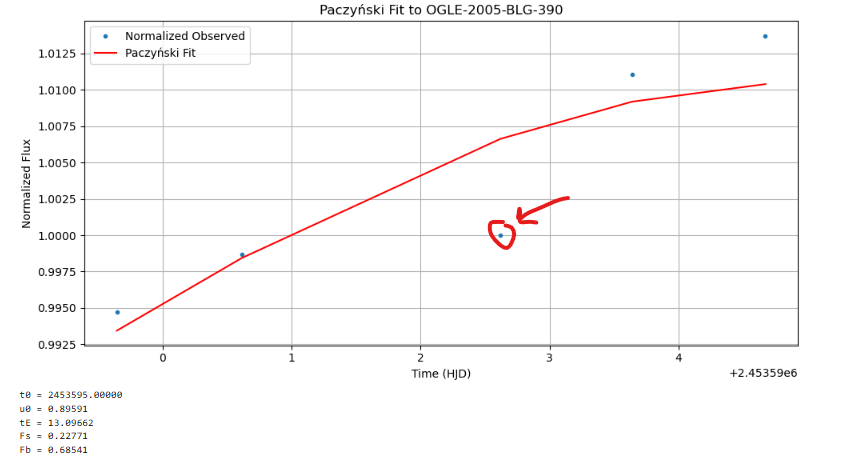

In [28]:
from IPython.display import Image
Image(filename='../plots/planet_bump_annotated.png')


### 🔍 Planetary Anomaly Detected

The red-circled point below is likely the planetary anomaly caused by OGLE-2005-BLG-390Lb:

![Planetary Anomaly](../plots/planet_bump_annotated.png)